<a href="https://colab.research.google.com/github/Mdanish2020/Beer_review_analysis/blob/main/Beer_evolent_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **BEER ABV DATA SCIENCE PROJECT**
---
---
### **Description**

Beer is one of the oldest and most widely consumed alcoholic drinks in the world, and the third most popular drink overall after water and tea. It is produced by the brewing and fermentation of starches, mainly derived from cereal grains—most commonly from malted barley, though wheat, maize (corn), rice, and oats are also used. During the brewing process, fermentation of the starch sugars in the wort produces ethanol and carbonation in the resulting beer. Most modern beer is brewed with hops, which add bitterness and other flavours and act as a natural preservative and stabilizing agent. Other flavouring agents such as gruit, herbs, or fruits may be included or used instead of hops. In commercial brewing, the natural carbonation effect is often removed during processing and replaced with forced carbonation.

### **Objective**
To look into data and get insights that are useful for the business, I am going to analyze according to the questions that are given below.

### **Questions**
1.	Rank top 3 Breweries which produce the strongest beers?
2.	Which year did beers enjoy the highest ratings? 
3.	 Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?
5.	Which Beer style seems to be the favorite based on reviews written by users? 
6.	How does written review compare to overall review score for the beer styles?


In [ ]:
# importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

### Inviting our dataset from google drive.

In [ ]:
beer_data = pd.read_csv('/content/drive/MyDrive/Data/Evolent Project/BeerDataScienceProject.csv',encoding='ISO-8859-1')
beer_data.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


### Complete Description of columns
* beer_ABV : Alcohol by Volume
* beer_beerID: Particular ID of that beer
* beer_brewerID: brewing production ID
* beer_name: Name of Beer
* beer_style: Beer style is a term used to differentiate and categorise beers by factors such as colour, flavour, strength, ingredients, production method, recipe, history, or origin.
* beer_appearance: filtered or unfiltered(rating 1 to 5)
* review_palette: colors of beer(rating 1 to 5)
* review_overall: overall review of beer(rating 1 to 5)
* review_aroma: smell of beer(rating 1 to 5)
* review_text: text of the review
* review_time: timestamp for the review

In [ ]:
# shape of data 
print('Number of instances:',beer_data.shape[0])
print('Number of columns:',beer_data.shape[1])

Number of instances: 528870
Number of columns: 13


In [ ]:
# all info about data
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


Hurray! we don't have null values in our dataset.
* But beer_ABV is having missing values.
* review_time is showing in *int64* so we have to convert it into datetime.

### Missing Values

In [ ]:
missing_values = beer_data.isnull().sum()
total = len(beer_data)
missing_percent = (missing_values/total)*100
missing_df = pd.concat([missing_values,missing_percent],axis = 1,keys = ['Total Missing Values','Percentage %'])
missing_df

,Total Missing Values,Percentage
beer_ABV,20280,3.834591
beer_beerId,0,0.000000
beer_brewerId,0,0.000000
beer_name,0,0.000000
beer_style,0,0.000000
review_appearance,0,0.000000
review_palette,0,0.000000
review_overall,0,0.000000
review_taste,0,0.000000
review_profileName,115,0.021744


**It can be seen that there are three columns having high missing values, in which beer_ABV has the highest 3.8345%.**

We can drop these null values from our dataset to do further analysis.

In [ ]:
# dropping all the null values
beer_updated_data = beer_data.dropna()

#### Descriptive statistics

In [ ]:
# measures of central tendency
beer_data.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


* On average customers gave rating 3.86/5 to the beer appearance.
* Mean of overall review is about 3.833.
* Mean of taste review is around 3.765.
* On average Customers gave 3.81/5 rating the aroma of beer. 

In [ ]:
from datetime import time
beer_updated_data['review_time'] = pd.to_datetime(beer_updated_data['review_time'],unit='s')
beer_updated_data['review_time'].dtype()

In [ ]:
beer_updated_data['review_time'].head()

0   2009-02-16 20:57:03
1   2009-03-01 13:44:57
2   2009-03-01 14:10:04
3   2009-02-15 19:12:25
4   2010-12-30 18:53:26
Name: review_time, dtype: datetime64[ns]

review_time column is changed into datetime format.

### **Text Preprocessing**

In [ ]:
def expanding_words(para):
    '''
    Changing some informal words
    
    '''
    para = re.sub(r"won't", "will not", para)
    para = re.sub(r"can\'t", "can not", para)
    para = re.sub(r"n\'t", " not", para)
    para = re.sub(r"\'re", " are", para)
    para = re.sub(r"\'s", " is", para)
    para = re.sub(r"\'d", " would", para)
    para = re.sub(r"\'ll", " will", para)
    para = re.sub(r"\'t", " not", para)
    para = re.sub(r"\'ve", " have", para)
    para = re.sub(r"\'m", " am", para)
    return para

In [ ]:
# 
def preprocessing(x):
    x = str(x).lower()
    #remove words with numbers python                       
    x = re.sub("\S*\d\S*", "", x).strip()
    #remove urls from text python
    x = re.sub(r"http\S+", "", x)
    #remove spacial character
    x = re.sub('[^A-Za-z0-9]+', ' ', x)
    #expand english words
    x = expanding_words(x)
    return x

In [ ]:
# Changing the texts with preprocessing function
beer_updated_data['review_text'] = beer_updated_data['review_text'].apply(preprocessing)

Now our review_text is ready for the text analysis

---
### **Questions**
### 1.	Rank top 3 Breweries which produce the strongest beers?.
---
---

In [ ]:
# getting the top three strongest beer
strong_beer = beer_updated_data[['beer_ABV','beer_name']]
top_three_strongest_beer = strong_beer.sort_values(by='beer_ABV',ascending=False).drop_duplicates('beer_name')
top_three_strongest_beer.head(3)


,beer_ABV,beer_name
12889,57.70,Schorschbräu Schorschbock 57%
12910,43.00,Schorschbräu Schorschbock 43%
12911,39.44,Schorschbräu Schorschbock 40%


Text(0.5, 1.0, 'Strongest Beer')

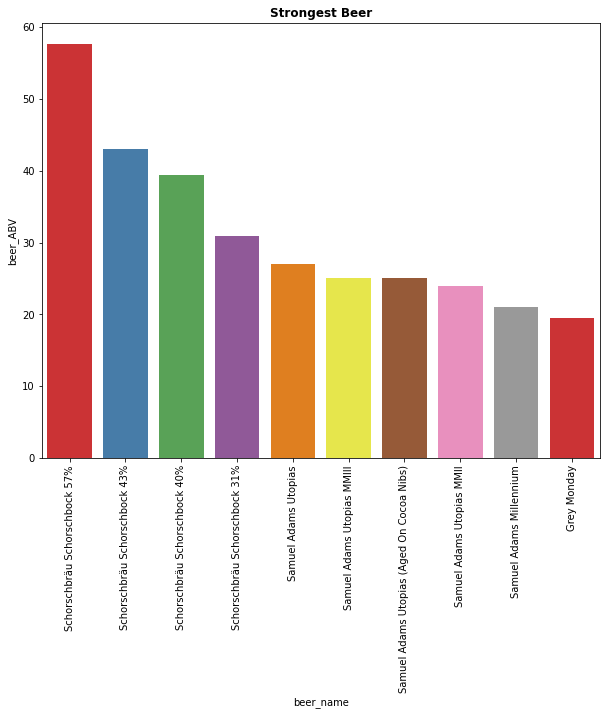

In [ ]:
# Plotting top strongest beers
plt.figure(figsize = (10,8))
sns.barplot(x = 'beer_name',y = 'beer_ABV',data = top_three_strongest_beer.head(10),palette = 'Set1')
plt.xticks(rotation = 90)
plt.title('Strongest Beer',fontweight = 'bold',fontsize = 12)

### **Top Three Beers**

	beer_ABV	beer_name
* Schorschbräu Schorschbock 57%
* Schorschbräu Schorschbock 43%
* Schorschbräu Schorschbock 40%

---
### 2.	Which year did beers enjoy the highest ratings? 
---
---

In [ ]:
# Introducing Year column from review_time column
beer_updated_data['Year'] = beer_updated_data['review_time'].apply(lambda z: z.strftime('%Y'))

In [ ]:
top_ratings = beer_updated_data[['Year','review_overall']].sort_values(by = 'review_overall',ascending = False)

Text(0.5, 1.0, 'Highest Ratings in years')

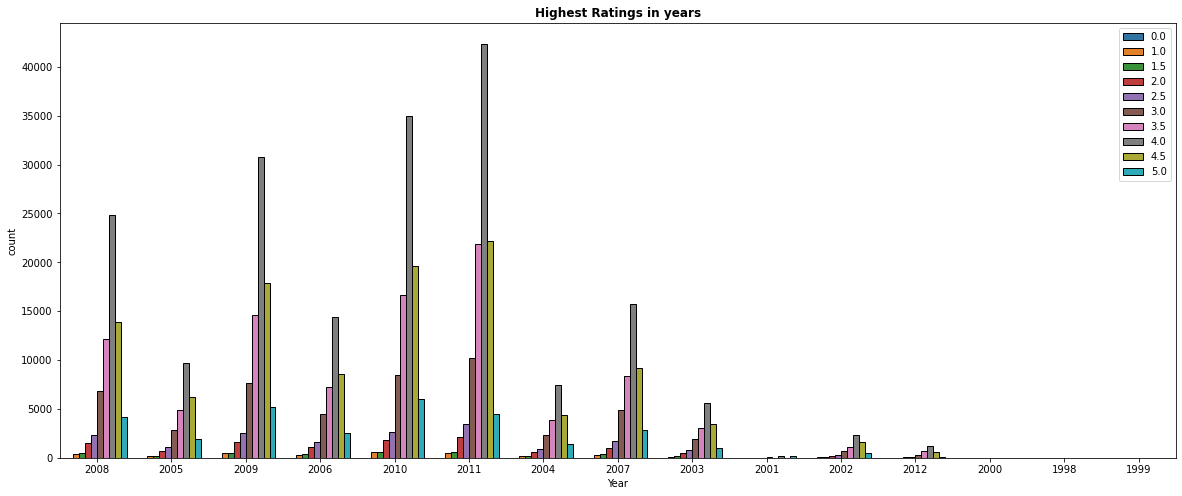

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'Year',hue = 'review_overall',data = top_ratings,edgecolor = 'black')
plt.legend(loc = 'upper right')
plt.title('Highest Ratings in years',fontweight = 'bold',fontsize = 12)



```
From this plot we are comparing all the years for each rating so we can say that 2011 have the highest rating with 4.0 for beers to enjoy
```



### **2011 enjoyed the highest ratings among all the years.**

---
### 3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
---
---

review overall is the average of (aroma, taste, appearance & palette) so we can take *review_overall* as an independent variable and *review_aroma, review_taste, review_appearance, and review_palette* would be the dependent variables.
Among all these independent variables whichever will have high correlation with the dependent one will be considered as the most import factor.

So, we'll be using correlation matrix here.

### **Correlation Matrix**

In [ ]:
# combining all factors in one dataframe
important_factors = beer_updated_data[['review_appearance','review_aroma','review_taste','review_palette','review_overall']]

In [ ]:
important_factors.corr()

,review_appearance,review_aroma,review_taste,review_palette,review_overall
review_appearance,1.000000,0.531204,0.551979,0.544724,0.483091
review_aroma,0.531204,1.000000,0.722737,0.703428,0.780310
review_taste,0.551979,0.722737,1.000000,0.600842,0.689276
review_palette,0.544724,0.703428,0.600842,1.000000,0.598048
review_overall,0.483091,0.780310,0.689276,0.598048,1.000000


Text(0.5, 1.0, 'Correlation map.')

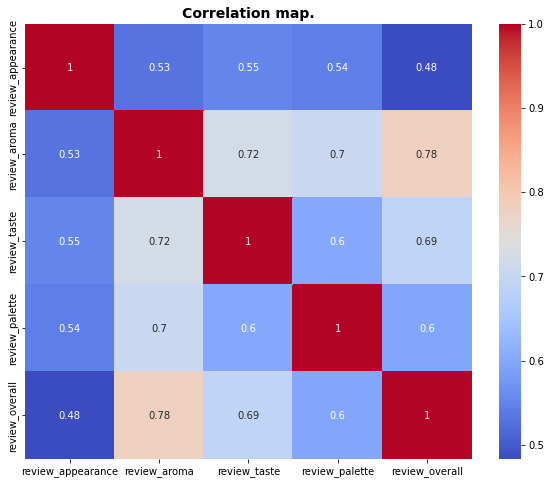

In [ ]:
plt.figure(figsize = (10,8))
correlation = important_factors.corr()
sns.heatmap(abs(correlation),cmap = 'coolwarm',annot = True)
plt.title("Correlation map.",fontweight = 'bold',fontsize = 14)

### **Conclusion**: According to the correlation matrix following would be the most important factors among users.

* review_aroma with **0.78** correlation with review_overall.
* review_taste with **0.69** correlation with review_overall.
* similarly review_palette with **0.6** and review_appearance with **0.48**.

So, the order of importance of factors among the users would be like this 


```
Aroma > taste > palette > appearance
```




---
###  4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?
---
---

First of all I do not drink beer so, I'll definitely not recommend any of the beer to my friend but in worst case scenario if he asks me any top 3 beers then keeping his health safety in my mind, I'll recommend the most top rated and top reviewed because as a Data Scientist it'll be my responsibility to recommend him the best ones.

In [ ]:
# I'll recommend him the beer which got top ratings on average
top_beer_rating = beer_updated_data.groupby('beer_name').aggregate({'review_overall':np.mean,'review_appearance':np.mean,'review_taste':np.mean,'review_aroma':np.mean,'review_palette':np.mean,'beer_ABV':np.mean})

recom_beer = pd.DataFrame(top_beer_rating.reset_index())

top_three_recomm = recom_beer.sort_values(['review_overall', 'review_appearance','review_taste','review_aroma','review_palette','beer_ABV'], ascending=[False,False, False, False, False, False])
top_three_recomm[:3]

,beer_name,review_overall,review_appearance,review_taste,review_aroma,review_palette,beer_ABV
4036,Edsten Triple-Wit,5.0,5.0,5.0,5.0,5.0,10.0
9088,Old Gander Barley Wine,5.0,5.0,5.0,5.0,5.0,9.5
10481,Rogue Black Brutal,5.0,5.0,5.0,5.0,5.0,9.0


### So these three would be the one that I recommend to my friend.
1. **Edsten Triple-Wit**
2. **Old Gander Barley Wine**
3. **Rogue Black Brutal**

---
### 5. 5.	Which Beer style seems to be the favorite based on reviews written by users?
---
---

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
beer_updated_data['Scores'] = beer_updated_data['review_text'].apply(lambda review_text:sia.polarity_scores(review_text))

In [ ]:
beer_updated_data['Scores'][0]

{'compound': 0.1879, 'neg': 0.062, 'neu': 0.861, 'pos': 0.077}

We can see that negative sentiment is 0.062, positive are 0.077, neutral is 0.861 and the combination of all these three is compound is 0.1879.

In [ ]:
beer_updated_data['compound'] = beer_updated_data['Scores'].apply(lambda d:d['compound'])

In [ ]:
# making a senseful metric here
beer_updated_data['sentiment_review_score'] = beer_updated_data['compound'].apply(lambda score: 'neutral' if (score >=0 and score <=0.5) else ('pos' if score > 0.5 else 'neg'))

Here, I define if score is in between 0 to 0.5 it will be considered as neutral and if score is greater than 0.5 it will be positive and negative one will be negaitves.

In [ ]:
# total counts of positive negative and neutral sentiments
beer_updated_data['sentiment_review_score'].value_counts()

pos        443359
neutral     33230
neg         31769
Name: sentiment_review_score, dtype: int64

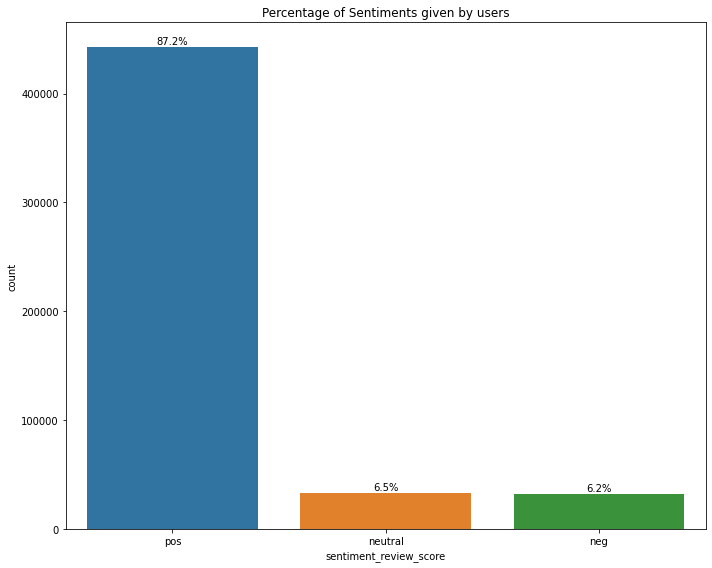

In [ ]:
# Graphical representaion of sentiments
plt.figure(figsize = (10,8))
ax = sns.countplot(beer_updated_data['sentiment_review_score'].sort_values(ascending = False))
plt.title('Percentage of Sentiments given by users')

total = len(beer_updated_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

In [ ]:
# combining beer_style and text_review_score together
fav_beer = beer_updated_data[['beer_style','text_review_score']]

In [ ]:
sentiment_fav_beer = fav_beer[fav_beer['text_review_score']=='pos']
sentiment_fav_beer

,beer_style,text_review_score
1,English Strong Ale,pos
3,German Pilsener,pos
4,American Double / Imperial IPA,pos
5,Herbed / Spiced Beer,pos
6,Herbed / Spiced Beer,pos
...,...,...
528791,German Pilsener,pos
528792,German Pilsener,pos
528793,German Pilsener,pos
528794,German Pilsener,pos


In [ ]:
# Looking which are the favourite beers among them
sentiment_fav_beer.groupby('beer_style')['text_review_score'].count().sort_values(ascending=False).head()

beer_style
American IPA                        36953
American Double / Imperial IPA      22828
American Double / Imperial Stout    21437
American Pale Ale (APA)             16194
Russian Imperial Stout              15342
Name: text_review_score, dtype: int64

## Favourite Beers among users on the basis of text reviews are these.
* American IPA
* American Double / Imperial IPA
* American Double / Imperial Stout
* American Pale Ale (APA
* Russian Imperial Stout

---
### 6. 6.	How does written review compare to overall review score for the beer styles?
---
---



In [ ]:
# Putting beer_style, review_overall and text_review_score and deleting the duplicated value
beer_comparison = beer_updated_data.drop_duplicates(subset=['beer_style','review_overall','text_review_score'],keep='first')

In [ ]:
beer_comparison[['beer_style','review_overall','text_review_score']]

,beer_style,review_overall,text_review_score
0,Hefeweizen,1.5,neutral
1,English Strong Ale,3.0,pos
2,Foreign / Export Stout,3.0,neutral
3,German Pilsener,3.0,pos
4,American Double / Imperial IPA,4.0,pos
...,...,...,...
507816,American Stout,5.0,neg
510003,Gose,1.0,neg
512809,Flanders Red Ale,1.5,neg
514313,Winter Warmer,5.0,neg


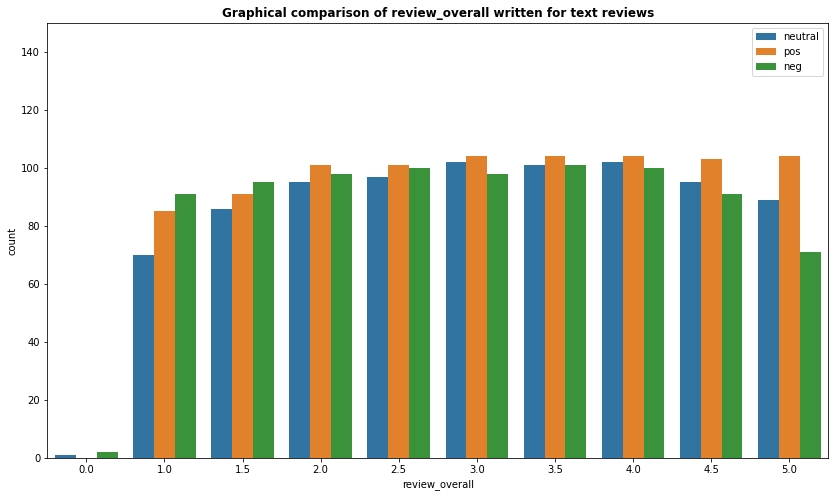

In [ ]:
plt.figure(figsize = (14,8))
sns.countplot(x = 'review_overall',hue = 'text_review_score',data = beer_comparison)
plt.title('Graphical comparison of review_overall written for text reviews',fontsize = 12,fontweight = 'bold')
plt.legend(loc = 'upper right')
plt.ylim(0,150)
plt.show()

Overall review and text review is not so differnt in comparison. We can clearly see here in the above the graph.